In [41]:
# Pipeline:

# 1) Design Model (input, output size, forward pass)
# 2) Construct loss and optimizer
# 3) Training Loop
#     - forward pass  : compute prediction
#     - backward pass : gradients
#     - update weights

In [42]:
import torch
import torch.nn as nn

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [43]:
# prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32)) # [100, 1]
y = torch.from_numpy(y_numpy.astype(np.float32)) # [100]

y = y.view(y.shape[0], 1) # [100, 1]

n_samples, n_features = X.shape

In [44]:
# 1) Model
input_size = n_features
output_size = n_features

model = nn.Linear(input_size, output_size)

In [45]:
# 2) Loss & Optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [46]:
# 3) training loop
num_epochs = 300
for epoch in range(num_epochs):
    # forward pass
    y_pred = model(X)
    
    # loss
    loss = criterion(y_pred, y)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    
    # zero gradients
    optimizer.zero_grad()
    
    if (epoch+1)%50 == 0:
        [w,b] = model.parameters()
        print('Epoch {}: w = {:.3f}, loss = {:.4f}'.format(epoch, w[0][0].item(), loss))

Epoch 49: w = 45.645, loss = 1433.1708
Epoch 99: w = 65.780, loss = 558.2324
Epoch 149: w = 74.888, loss = 379.3695
Epoch 199: w = 79.022, loss = 342.3444
Epoch 249: w = 80.903, loss = 334.6191
Epoch 299: w = 81.761, loss = 332.9993


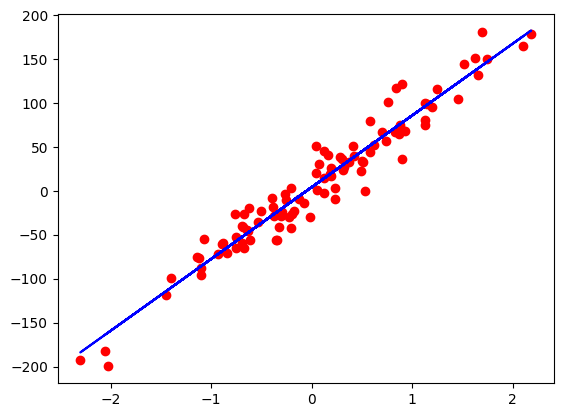

In [47]:
# plot

predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')